# Dimension Reduction

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.manifold import TSNE
import numpy as np
from umap import UMAP
import seaborn as sns

In [2]:
data_path = 'data/processed/combined_labeled_standardized.csv'
df = pd.read_csv(data_path)

## Preparation

In [3]:
df = df.dropna(axis=1)
X = df.drop(['healthy', 'patient_id'], axis=1)
Y = df['healthy']

## PCA

In [4]:
pca = PCA().fit(X)
explained = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained >= 0.95) + 1

print(f"Number of components for >=95% variance: {n_components}")


Number of components for >=95% variance: 379


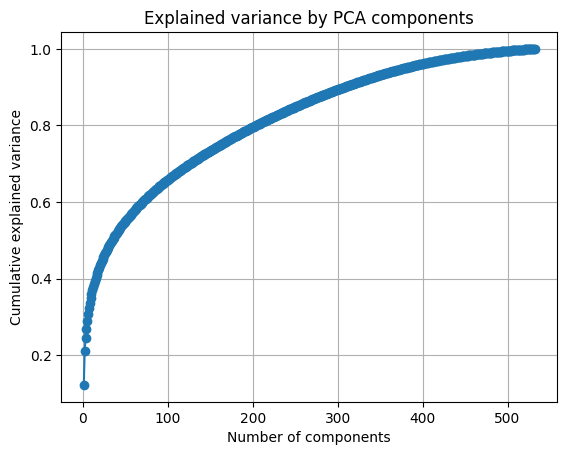

In [5]:
# Visualize explained variance
plt.figure()
plt.plot(np.arange(1, len(explained)+1), explained, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by PCA components')
plt.grid()
plt.show()

In [6]:
clf = RandomForestClassifier(random_state=42)
scores_no_pca = cross_val_score(clf, X, Y, cv=5)
print(f"Accuracy without PCA: {scores_no_pca.mean():.3f}")

pcaN = PCA(n_components=n_components)
X_pcaN = pcaN.fit_transform(X)
scores_pca = cross_val_score(clf, X_pcaN,Y, cv=5)
print(f"Accuracy with PCA ({n_components} components): {scores_pca.mean():.3f}")

Accuracy without PCA: 1.000
Accuracy with PCA (379 components): 0.789


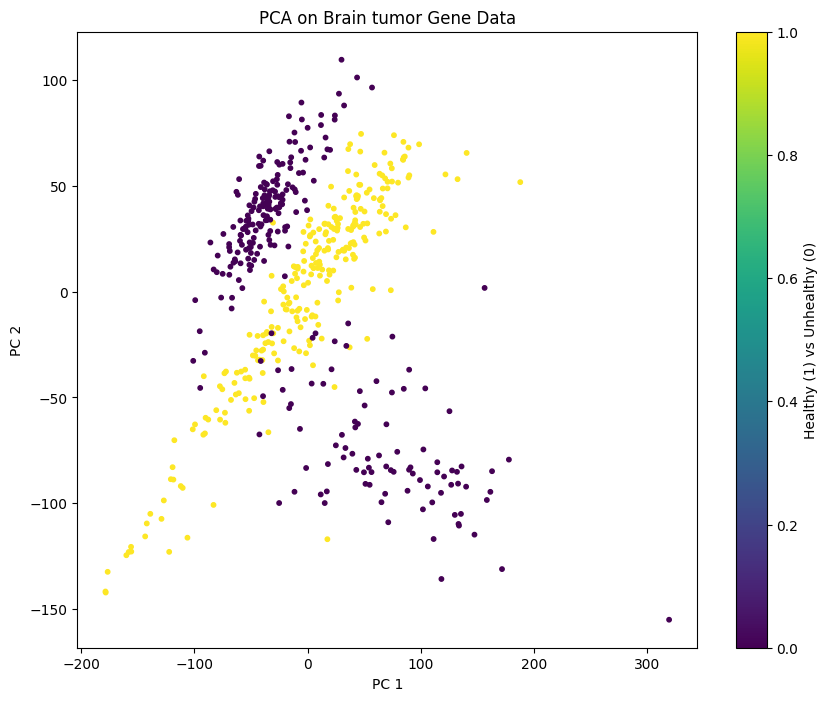

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pcaN[:, 0], X_pcaN[:, 1], c=Y, cmap='viridis', s=10)
plt.title('PCA on Brain tumor Gene Data')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Healthy (1) vs Unhealthy (0)')
plt.show()

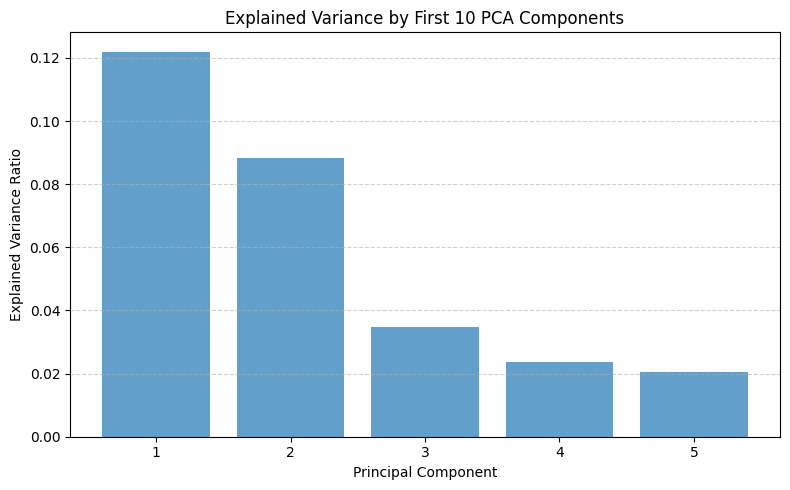

In [8]:


# Get explained variance ratio
explained_var = pcaN.explained_variance_ratio_

# Plot first 10 components
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), explained_var[:5], alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by First 10 PCA Components')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(np.arange(1, 6))
plt.tight_layout()
plt.show()

## T-SNE

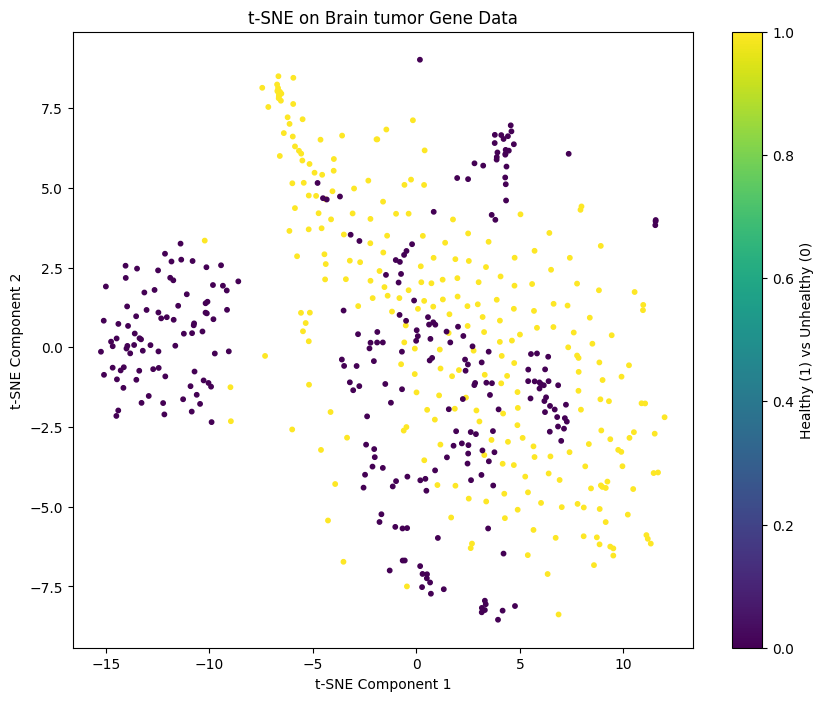

In [9]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap='viridis', s=10)
plt.title('t-SNE on Brain tumor Gene Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Healthy (1) vs Unhealthy (0)')
plt.show()

## UMAP

c:\dev\ai-brain-tumor\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


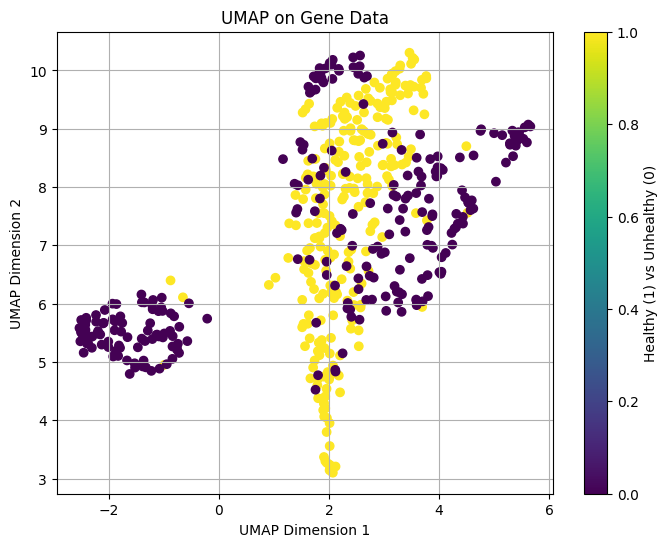

In [10]:
reducer = UMAP(n_components=2)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(x=X_umap[:, 0], y=X_umap[:, 1], c=Y, cmap='viridis')
plt.title("UMAP on Gene Data")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(label='Healthy (1) vs Unhealthy (0)')
plt.grid(True)
plt.show()